Step 1: First we're gonna check the shape and the Data set information also df.head() to print the first 5 rows

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data/
df = pd.read_csv('loan.csv', low_memory=False)

# Basic overview
print("Shape of dataset:", df.shape)
print("\nFirst few rows:")
print(df.head())


Shape of dataset: (39717, 111)

First few rows:
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0 

In [5]:
# Get data info (types and non-null counts)
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


Now we got the information where shape of the dataset is 39717 rows and 111 columns also here the first few rows printed Next step we'll check how many missing values 

In [6]:
# Set pandas to show all rows
pd.set_option('display.max_rows', None)
# Set display options to see all columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', None)        # Width of the display in characters
pd.set_option('display.max_colwidth', None) # Full width of each column

# Check missing values in all columns
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Reset back to default if needed
pd.set_option('display.max_rows', 60)  

Missing values in each column:
id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti      

Now we'll be removing the columns which has higher number of null values

In [7]:
# List of columns to drop (all have 39,717 missing values or all 0s )
columns_to_drop = [
    'acc_now_delinq','tax_liens','chargeoff_within_12_mths','desc','url',
    'pymnt_plan','policy_code','initial_list_status','collections_12_mths_ex_med',
    'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
    'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
    'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
    'mths_since_rcnt_il', 'total_bal_il', 'il_util',
    'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
    'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
    'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy',
    'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
    'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
    'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
    'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
    'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
    'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
    'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
    'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
    'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
    'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
    'total_il_high_credit_limit','mths_since_last_record','next_pymnt_d','mths_since_last_delinq'
]

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Verify the shape of the dataframe after dropping columns
print("DataFrame shape after dropping columns:", df.shape)

# Verify remaining missing values
print("\nRemaining missing values:")
print(df.isnull().sum()[df.isnull().sum() > 0])

DataFrame shape after dropping columns: (39717, 45)

Remaining missing values:
emp_title               2459
emp_length              1075
title                     11
revol_util                50
last_pymnt_d              71
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64


So Now we have removed most of the rows which are having huge missing values or all 0s and current dataframe we have is with same number of rows 39717 but the columns are 45. Now we'll handle the other missing values for the columns

WE'll be filling the emp_title which are null with the 'Not Provided' field   

In [8]:
#Replacing the emp_title with Not Provided
df['emp_title'] = df['emp_title'].fillna('Not Provided') 

# now to replace the emp length with median before replacing with median we need to clean the column cause it's in object form
#and not in integer so we'll be converting it into integer through regular expressions 
import re

def clean_emp_length(emp_length):
    if pd.isna(emp_length):
        return None
        
    # Case 1: If '<1' appears, return 0
    if '<' in str(emp_length):
        return 0
        
    # Case 2 & 3: Extract just the number for both "10+" and normal years
    # \d+ matches one or more digits
    numbers = re.findall(r'\d+', str(emp_length))
    if numbers:
        return int(numbers[0])
    return None

# Apply the function and fill NaN
df['emp_length'] = df['emp_length'].apply(clean_emp_length)
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].median())

print("Unique values and their counts after cleaning:")
print(df['emp_length'].value_counts().sort_index())



Unique values and their counts after cleaning:
emp_length
0.0     4583
1.0     3240
2.0     4388
3.0     4095
4.0     4511
5.0     3282
6.0     2229
7.0     1773
8.0     1479
9.0     1258
10.0    8879
Name: count, dtype: int64


now to replace the emp length with median before replacing with median we need to clean the column cause it's in object form and also the values are containing the symbols such as +,<, > so we'll be converting it into integer through regular expressions 

In [9]:

import re

def clean_emp_length(emp_length):
    if pd.isna(emp_length):
        return None
        
    # Case 1: If '<1' appears, return 0
    if '<' in str(emp_length):
        return 0
        
    # Case 2 & 3: Extract just the number for both "10+" and normal years
    # \d+ matches one or more digits
    numbers = re.findall(r'\d+', str(emp_length))
    if numbers:
        return int(numbers[0])
    return None

# Apply the function and fill NaN
df['emp_length'] = df['emp_length'].apply(clean_emp_length)
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].median())
df['emp_length'] = df['emp_length'].astype(float)

print("Unique values and their counts after cleaning:")
print(df['emp_length'].value_counts().sort_index())

Unique values and their counts after cleaning:
emp_length
0.0     4583
1.0     3240
2.0     4388
3.0     4095
4.0     4511
5.0     3282
6.0     2229
7.0     1773
8.0     1479
9.0     1258
10.0    8879
Name: count, dtype: int64


Now we've converted the emp_length to the required datatype below code we'll be cross checking out the unique values,describing them and how many null are present after change, for <1 we have replaced with 0 and for n+ like variables we have replaced with n

In [10]:
# 1. View unique values and their counts
print("Unique values and their counts:")
print(df['emp_length'].value_counts().sort_index())

# 2. View unique values sorted
print("\nUnique values sorted:")
print(sorted(df['emp_length'].unique()))

# 3. Basic statistics of the column
print("\nBasic statistics:")
print(df['emp_length'].describe())

# 4. Check for any remaining nulls
print("\nNumber of null values:")
print(df['emp_length'].isnull().sum())

# 6. Verify the data type
print("\nData type of the column:")
print(df['emp_length'].dtype)

Unique values and their counts:
emp_length
0.0     4583
1.0     3240
2.0     4388
3.0     4095
4.0     4511
5.0     3282
6.0     2229
7.0     1773
8.0     1479
9.0     1258
10.0    8879
Name: count, dtype: int64

Unique values sorted:
[np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(10.0)]

Basic statistics:
count    39717.000000
mean         4.947101
std          3.517584
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

Number of null values:
0

Data type of the column:
float64


Converting the emp_length field to Float type.

In [11]:
# removing months from the column and converting it to integer, e.g. 36 months to 36
df['term'] = df['term'].str.replace(' months', '').astype(int)


In [12]:
#Shape post the coli
df.shape

(39717, 45)

Filling the desc field with empty strings 

The revol_util is in the form of datatype object like '93%' we'll be removing the % from the string and converting the whole into float

In [13]:
# Remove the '%' sign and convert to float directly
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float')

# Fill null values with median
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())

# Let's verify the conversion
print("\nSample of revol_util values after conversion:")
print(df['revol_util'].head())
print("\nBasic statistics of revol_util:")
print(df['revol_util'].describe())


Sample of revol_util values after conversion:
0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64

Basic statistics of revol_util:
count    39717.000000
mean        48.832741
std         28.314798
min          0.000000
25%         25.500000
50%         49.300000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64


Handling Other Missing Values

In [14]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)  # 697 missing

In [15]:
print(df['revol_util'].head())


0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64


In [16]:
df['last_pymnt_d'] = df['last_pymnt_d'].fillna(df['last_pymnt_d'].mode()[0])


Still Checking How many Missing Columns are present

In [17]:
print("Missing values in each column:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Missing values in each column:
title                 11
last_credit_pull_d     2
dtype: int64


In [18]:
# Look at some of the existing titles to understand what they look like
print("Sample of existing titles:")
print(df['title'].value_counts().head())

print("\nRows with missing titles:")
print(df[df['title'].isnull()][['loan_status', 'loan_amnt', 'purpose']].head())

Sample of existing titles:
title
Debt Consolidation         2184
Debt Consolidation Loan    1729
Personal Loan               659
Consolidation               517
debt consolidation          505
Name: count, dtype: int64

Rows with missing titles:
       loan_status  loan_amnt             purpose
25188   Fully Paid       8000               other
27477   Fully Paid      20000         credit_card
28469   Fully Paid      13750               other
28700  Charged Off      10000      small_business
28710   Fully Paid       1800  debt_consolidation


In [19]:
# Create a function to map purpose to title
def get_title_from_purpose(purpose):
    purpose_to_title = {
        'debt_consolidation': 'Debt Consolidation',
        'credit_card': 'Credit Card Refinancing',
        'small_business': 'Business Loan',
        'other': 'Other',
    }
    return purpose_to_title.get(purpose, 'Personal Loan')

# Fill missing titles based on purpose
df['title'] = df['title'].fillna(df.apply(lambda x: get_title_from_purpose(x['purpose']) if pd.isnull(x['title']) else x['title'], axis=1))

# Verify the changes
print("Missing values in title after filling:", df['title'].isnull().sum())

Missing values in title after filling: 0


ROWS

In [20]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [21]:
# Check loan amounts for unusual values
print("\nLoan amount statistics:")
print(df['loan_amnt'].describe())

# Check interest rates for unusual values
print("\nInterest rate statistics:")
print(df['int_rate'].describe())

# Check for unusual grades
print("\nGrade distribution:")
print(df['grade'].value_counts())


Loan amount statistics:
count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Interest rate statistics:
count      39717
unique       371
top       10.99%
freq         956
Name: int_rate, dtype: object

Grade distribution:
grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64


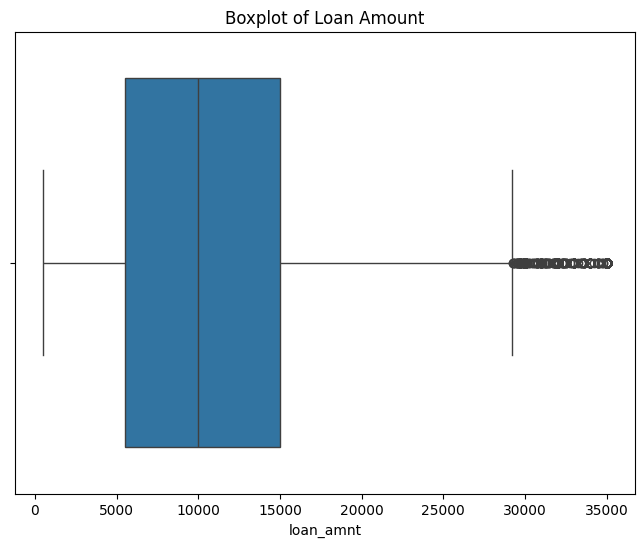

In [22]:
# Boxplot for 'LoanAmount'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['loan_amnt'])
plt.title('Boxplot of Loan Amount')
plt.show()

In [23]:
# Check distribution of loan statuses
print("\nLoan status distribution:")
print(df['loan_status'].value_counts())


Loan status distribution:
loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64


The int_rate was also in the form of object type converting it into float by removing the % 

In [24]:
# Convert interest rates to numeric
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float')

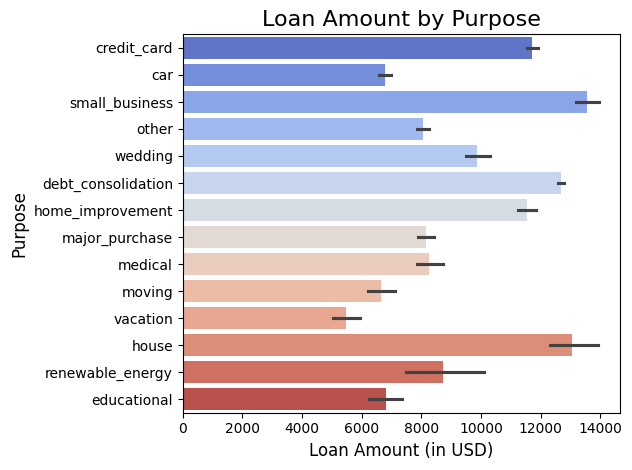

In [25]:
#Checking for what purpose do people takes most loan.
sns.barplot(x='loan_amnt', y='purpose',hue='purpose', data=df, palette='coolwarm')

# Adding title and labels
plt.title('Loan Amount by Purpose', fontsize=16)
plt.xlabel('Loan Amount (in USD)', fontsize=12)
plt.ylabel('Purpose', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

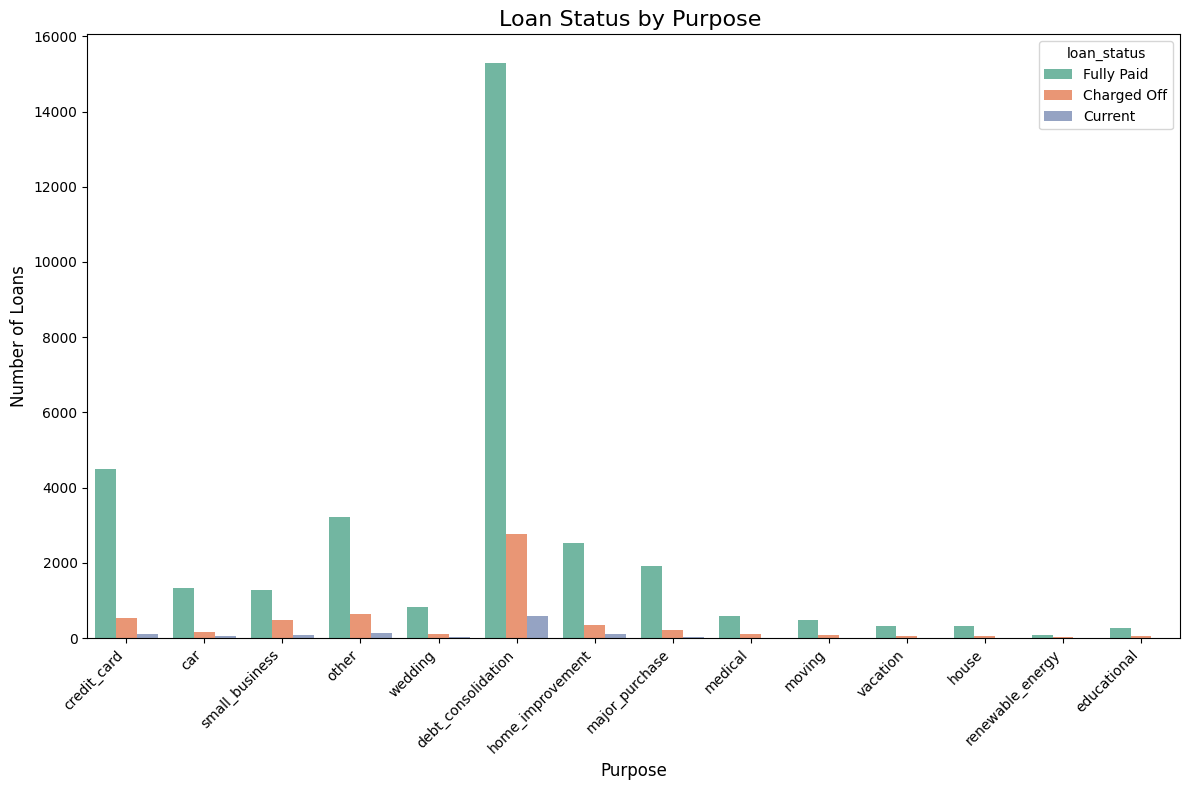

In [26]:
plt.figure(figsize=(12, 8))

# Create a count plot for Loan Status vs Purpose
sns.countplot(x='purpose', hue='loan_status', data=df, palette='Set2')

# Add title and labels
plt.title('Loan Status by Purpose ', fontsize=16)
plt.xlabel('Purpose', fontsize=12)
plt.ylabel('Number of Loans', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

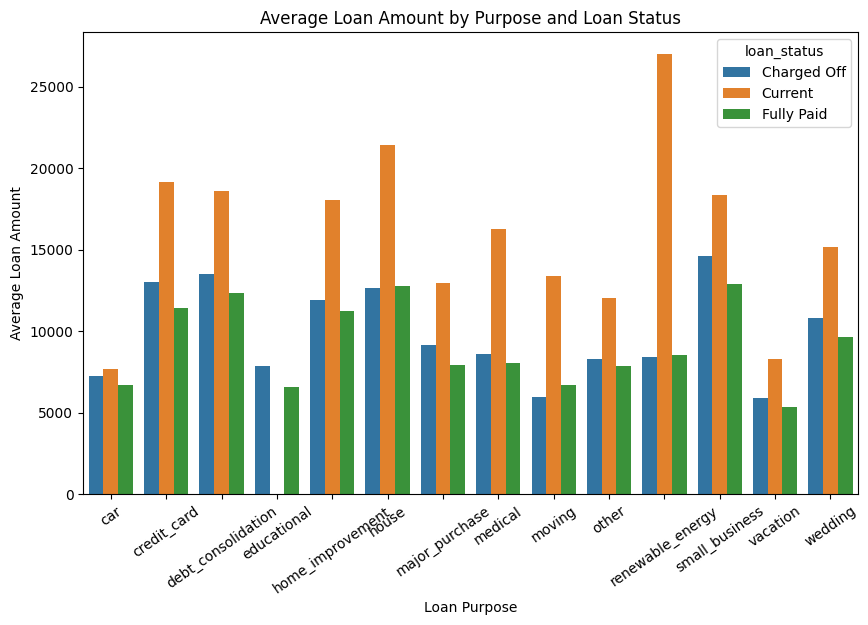

In [29]:
#Checking what all average amount are paid or charged off based on purpose
plt.figure(figsize=(10, 6))
loan_summary = df.groupby(['purpose', 'loan_status'])['loan_amnt'].mean().reset_index()

sns.barplot(data=loan_summary, x='purpose', y='loan_amnt', hue='loan_status')

# Set the title and labels
plt.title('Average Loan Amount by Purpose and Loan Status')
plt.xlabel('Loan Purpose')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=35)

# Show the plot
plt.show()

In [167]:
print("\nLoan amount statistics:")
print(df['loan_amnt'].describe())

# Check interest rates for unusual values
print("\nInterest rate statistics:")
print(df['int_rate'].describe())

# Check for unusual grades
print("\nGrade distribution:")
print(df['grade'].value_counts())


Loan amount statistics:
count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Interest rate statistics:
count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

Grade distribution:
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64


In [175]:
# Split numerical columns into groups for better visibility
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols_list = list(numerical_cols)

# Create groups of columns (e.g., 5 columns at a time)
group_size = 5
for i in range(0, len(num_cols_list), group_size):
    group = num_cols_list[i:i + group_size]
    print(f"\nDescriptive Statistics for columns {i+1} to {i+len(group)}:")
    print(df[group].describe())
    print("\nColumns analyzed:", group)
    print("-" * 80)


Descriptive Statistics for columns 1 to 5:
                 id     member_id     loan_amnt   funded_amnt  funded_amnt_inv
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000     39717.000000
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196     10397.448868
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670      7128.450439
min    5.473400e+04  7.069900e+04    500.000000    500.000000         0.000000
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000      5000.000000
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000      8975.000000
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000     14400.000000
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000     35000.000000

Columns analyzed: ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv']
--------------------------------------------------------------------------------

Descriptive Statistics for columns 6 to 10:
           int_rate   installment

In [83]:
# Set display options to see all columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', None)        # Width of the display in characters
pd.set_option('display.max_colwidth', None) # Full width of each column

# Now view the first few rows
print("First few rows of the dataset with all columns:")
print(df.head())

# To get column names
print("\nAll column names in the dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

# If you want to reset back to default settings later
# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_rows')
# pd.reset_option('display.width')
# pd.reset_option('display.max_colwidth')

First few rows of the dataset with all columns:
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term int_rate  \
0  1077501    1296599       5000         5000           4975.0    36   10.65%   
1  1077430    1314167       2500         2500           2500.0    60   15.27%   
2  1077175    1313524       2400         2400           2400.0    36   15.96%   
3  1076863    1277178      10000        10000          10000.0    36   13.49%   
4  1075358    1311748       3000         3000           3000.0    60   12.69%   

   installment grade sub_grade                 emp_title  emp_length  \
0       162.87     B        B2              Not Provided        10.0   
1        59.83     C        C4                     Ryder         0.0   
2        84.33     C        C5              Not Provided        10.0   
3       339.31     C        C1       AIR RESOURCES BOARD        10.0   
4        67.79     B        B5  University Medical Group         1.0   

  home_ownership  annual_inc ver

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          39717 non-null  int64   
 1   member_id                   39717 non-null  int64   
 2   loan_amnt                   39717 non-null  int64   
 3   funded_amnt                 39717 non-null  int64   
 4   funded_amnt_inv             39717 non-null  float64 
 5   term                        39717 non-null  object  
 6   int_rate                    39717 non-null  float64 
 7   installment                 39717 non-null  float64 
 8   grade                       39717 non-null  object  
 9   sub_grade                   39717 non-null  object  
 10  emp_title                   39717 non-null  object  
 11  emp_length                  39717 non-null  float64 
 12  home_ownership              39717 non-null  object  
 13  annual_inc      

UNIVARIATE ANALYSIS

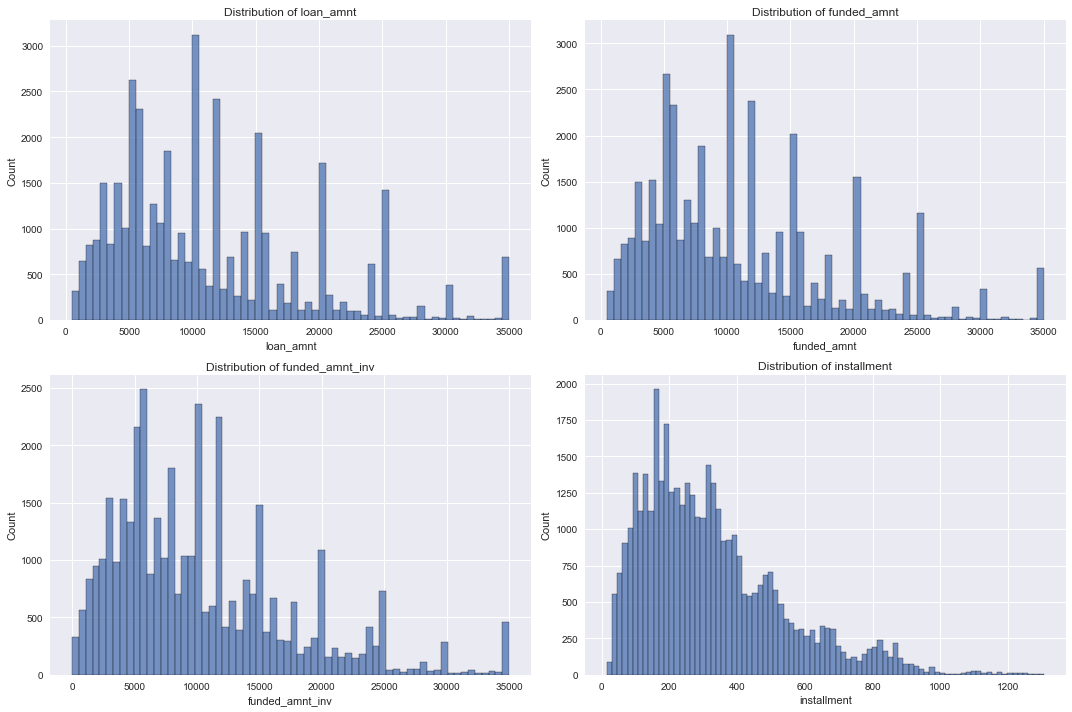

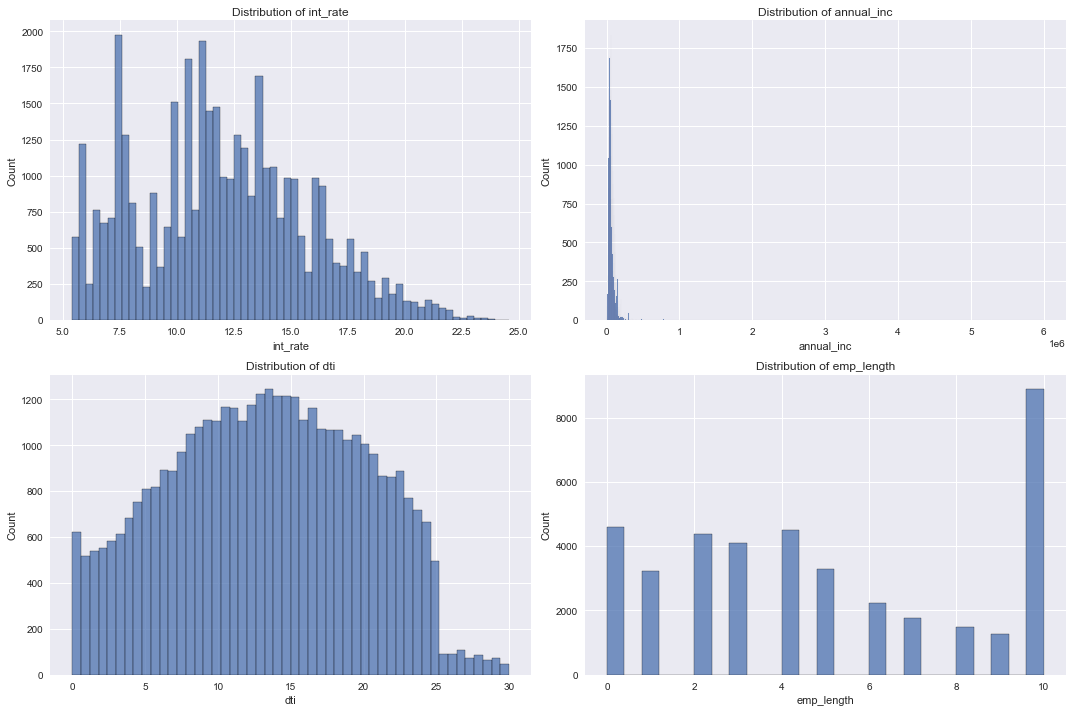

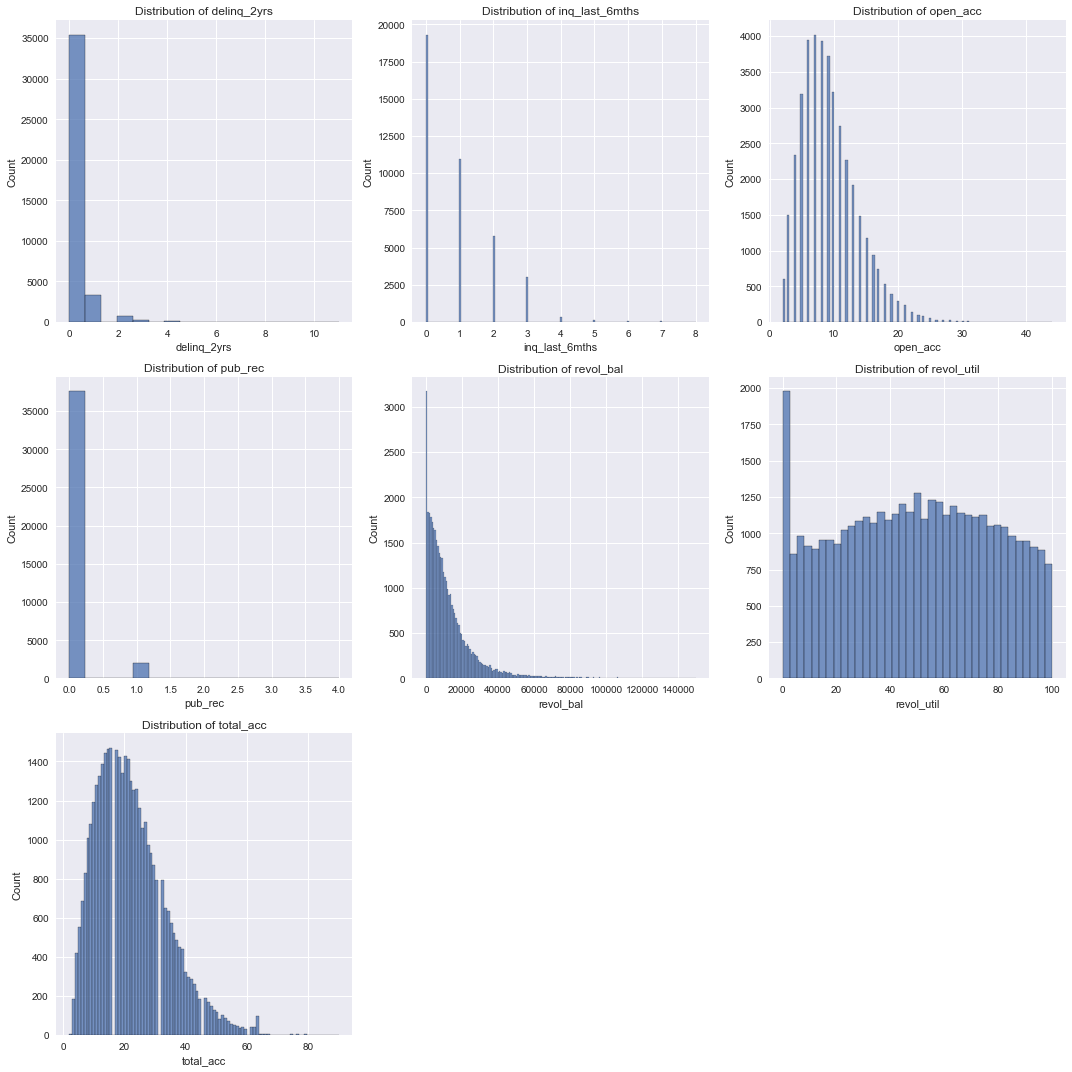

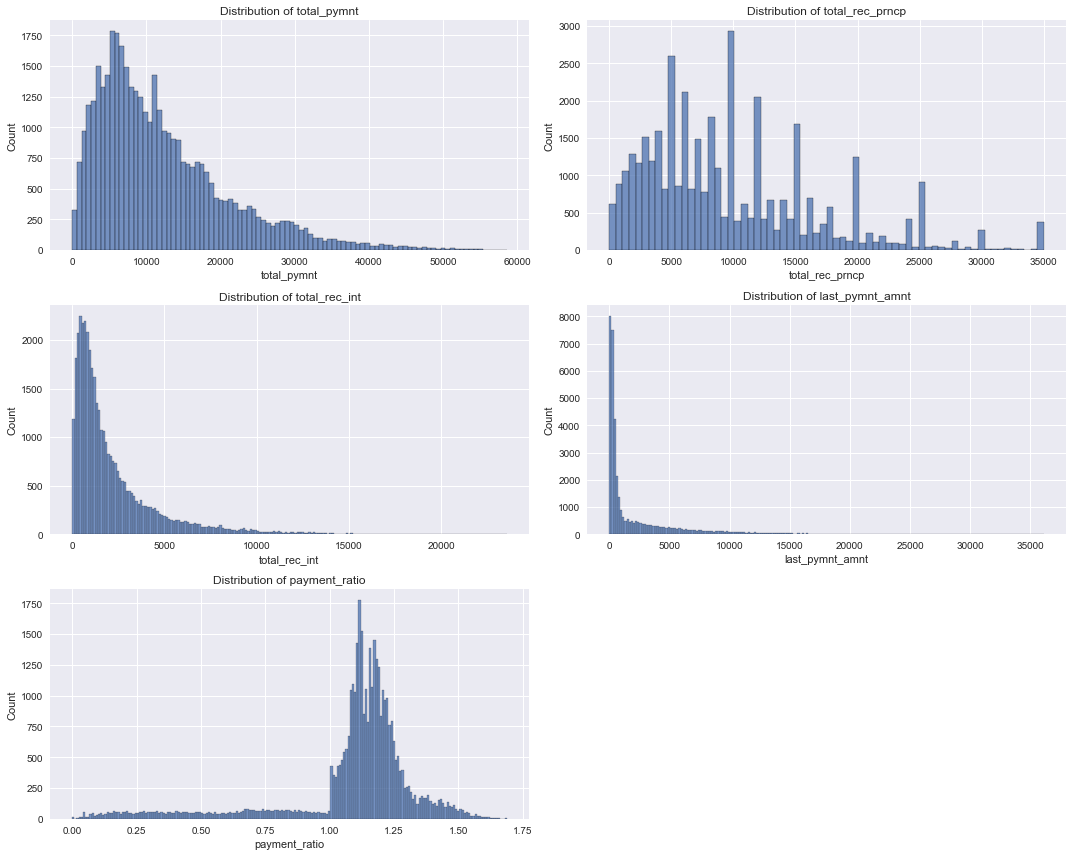

In [183]:
# Loan Amount Related
loan_amount_vars = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment']

plt.figure(figsize=(15, 10))
for i, var in enumerate(loan_amount_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=var)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

# Interest and Income Related
financial_vars = ['int_rate', 'annual_inc', 'dti', 'emp_length']

plt.figure(figsize=(15, 10))
for i, var in enumerate(financial_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=var)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

# Credit History Related (need more subplots due to more variables)
credit_vars = ['delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 
               'revol_util', 'total_acc']

plt.figure(figsize=(15, 15))  # Larger figure for more variables
for i, var in enumerate(credit_vars, 1):
    plt.subplot(3, 3, i)  # 3x3 grid to accommodate 7 variables
    sns.histplot(data=df, x=var)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

# Payment Related
payment_vars = ['total_pymnt', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'payment_ratio']

plt.figure(figsize=(15, 12))
for i, var in enumerate(payment_vars, 1):
    plt.subplot(3, 2, i)  # 3x2 grid for 5 variables
    sns.histplot(data=df, x=var)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

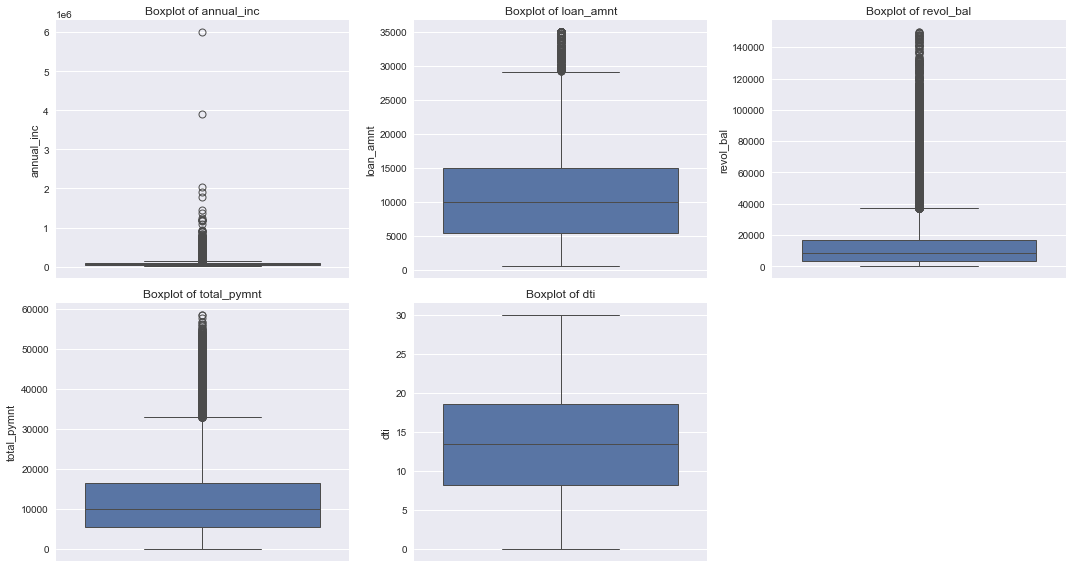


Outliers in annual_inc:
Number of outliers: 1843
Percentage of outliers: 4.64%
Lower bound: -22440.00
Upper bound: 145144.00
Min value: 4000.00
Max value: 6000000.00

Outliers in loan_amnt:
Number of outliers: 1230
Percentage of outliers: 3.10%
Lower bound: -8750.00
Upper bound: 29250.00
Min value: 500.00
Max value: 35000.00

Outliers in revol_bal:
Number of outliers: 2497
Percentage of outliers: 6.29%
Lower bound: -16329.50
Upper bound: 37090.50
Min value: 0.00
Max value: 149588.00

Outliers in total_pymnt:
Number of outliers: 1334
Percentage of outliers: 3.36%
Lower bound: -10859.32
Upper bound: 32970.69
Min value: 0.00
Max value: 58563.68

Outliers in dti:
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: -7.48
Upper bound: 34.25
Min value: 0.00
Max value: 29.99


In [184]:
# Key variables to check for outliers
vars_to_check = ['annual_inc', 'loan_amnt', 'revol_bal', 'total_pymnt', 'dti']

# Create box plots to visualize outliers
plt.figure(figsize=(15, 8))
for i, var in enumerate(vars_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[var])
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

# Calculate IQR and outlier bounds for each variable
for var in vars_to_check:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)][var]
    print(f"\nOutliers in {var}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(df))*100:.2f}%")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    print(f"Min value: {df[var].min():.2f}")
    print(f"Max value: {df[var].max():.2f}")

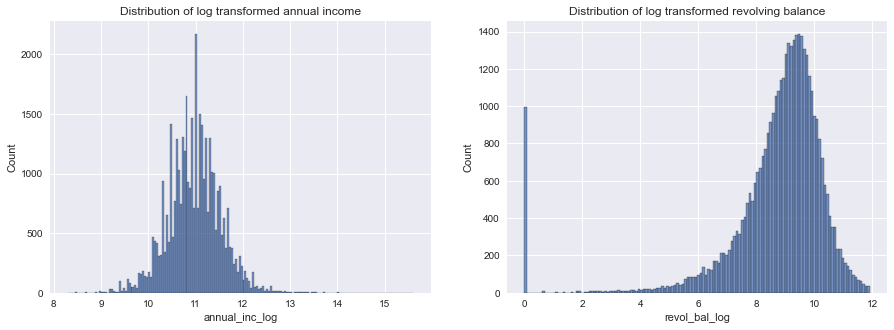

In [185]:
# Log transform annual_inc and revol_bal
df['annual_inc_log'] = np.log1p(df['annual_inc'])  # log1p handles zero values
df['revol_bal_log'] = np.log1p(df['revol_bal'])

# Verify transformations
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='annual_inc_log')
plt.title('Distribution of log transformed annual income')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='revol_bal_log')
plt.title('Distribution of log transformed revolving balance')
plt.show()

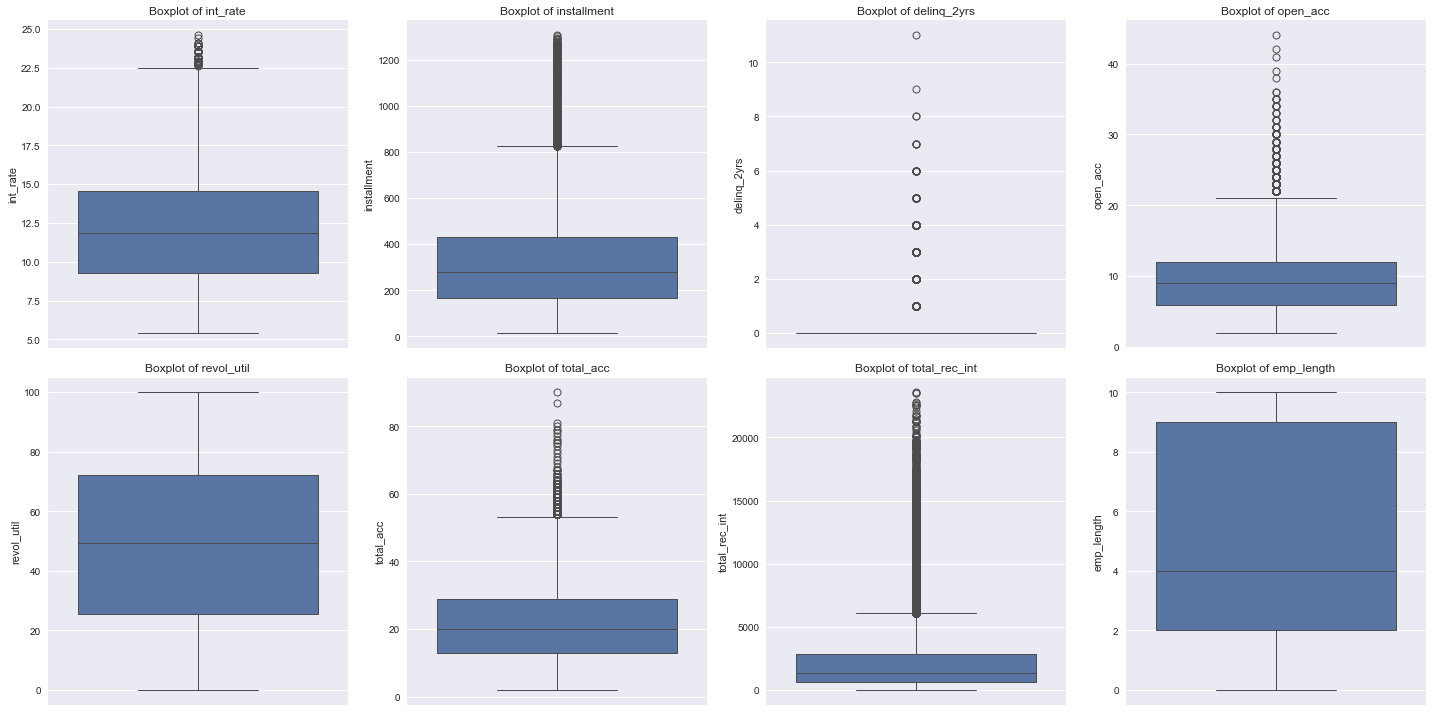


Outliers in int_rate:
Number of outliers: 78
Percentage of outliers: 0.20%
Lower bound: 1.24
Upper bound: 22.60
Min value: 5.42
Max value: 24.59

Outliers in installment:
Number of outliers: 1245
Percentage of outliers: 3.13%
Lower bound: -228.62
Upper bound: 826.42
Min value: 15.69
Max value: 1305.19

Outliers in delinq_2yrs:
Number of outliers: 4312
Percentage of outliers: 10.86%
Lower bound: 0.00
Upper bound: 0.00
Min value: 0.00
Max value: 11.00

Outliers in open_acc:
Number of outliers: 515
Percentage of outliers: 1.30%
Lower bound: -3.00
Upper bound: 21.00
Min value: 2.00
Max value: 44.00

Outliers in revol_util:
Number of outliers: 0
Percentage of outliers: 0.00%
Lower bound: -44.70
Upper bound: 142.50
Min value: 0.00
Max value: 99.90

Outliers in total_acc:
Number of outliers: 525
Percentage of outliers: 1.32%
Lower bound: -11.00
Upper bound: 53.00
Min value: 2.00
Max value: 90.00

Outliers in total_rec_int:
Number of outliers: 3157
Percentage of outliers: 7.95%
Lower bound: -

In [186]:
# Additional variables to check for outliers
additional_vars = ['int_rate', 'installment', 'delinq_2yrs', 'open_acc', 
                  'revol_util', 'total_acc', 'total_rec_int', 'emp_length']

# Create box plots
plt.figure(figsize=(20, 10))
for i, var in enumerate(additional_vars, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[var])
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

# Calculate IQR and outlier bounds for each variable
for var in additional_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)][var]
    print(f"\nOutliers in {var}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(df))*100:.2f}%")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    print(f"Min value: {df[var].min():.2f}")
    print(f"Max value: {df[var].max():.2f}")

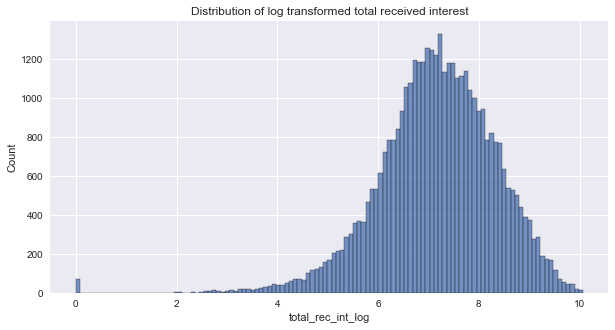

In [187]:
df['total_rec_int_log'] = np.log1p(df['total_rec_int'])

# Verify transformation
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='total_rec_int_log')
plt.title('Distribution of log transformed total received interest')
plt.show()

Univariate analysis for categorical variables

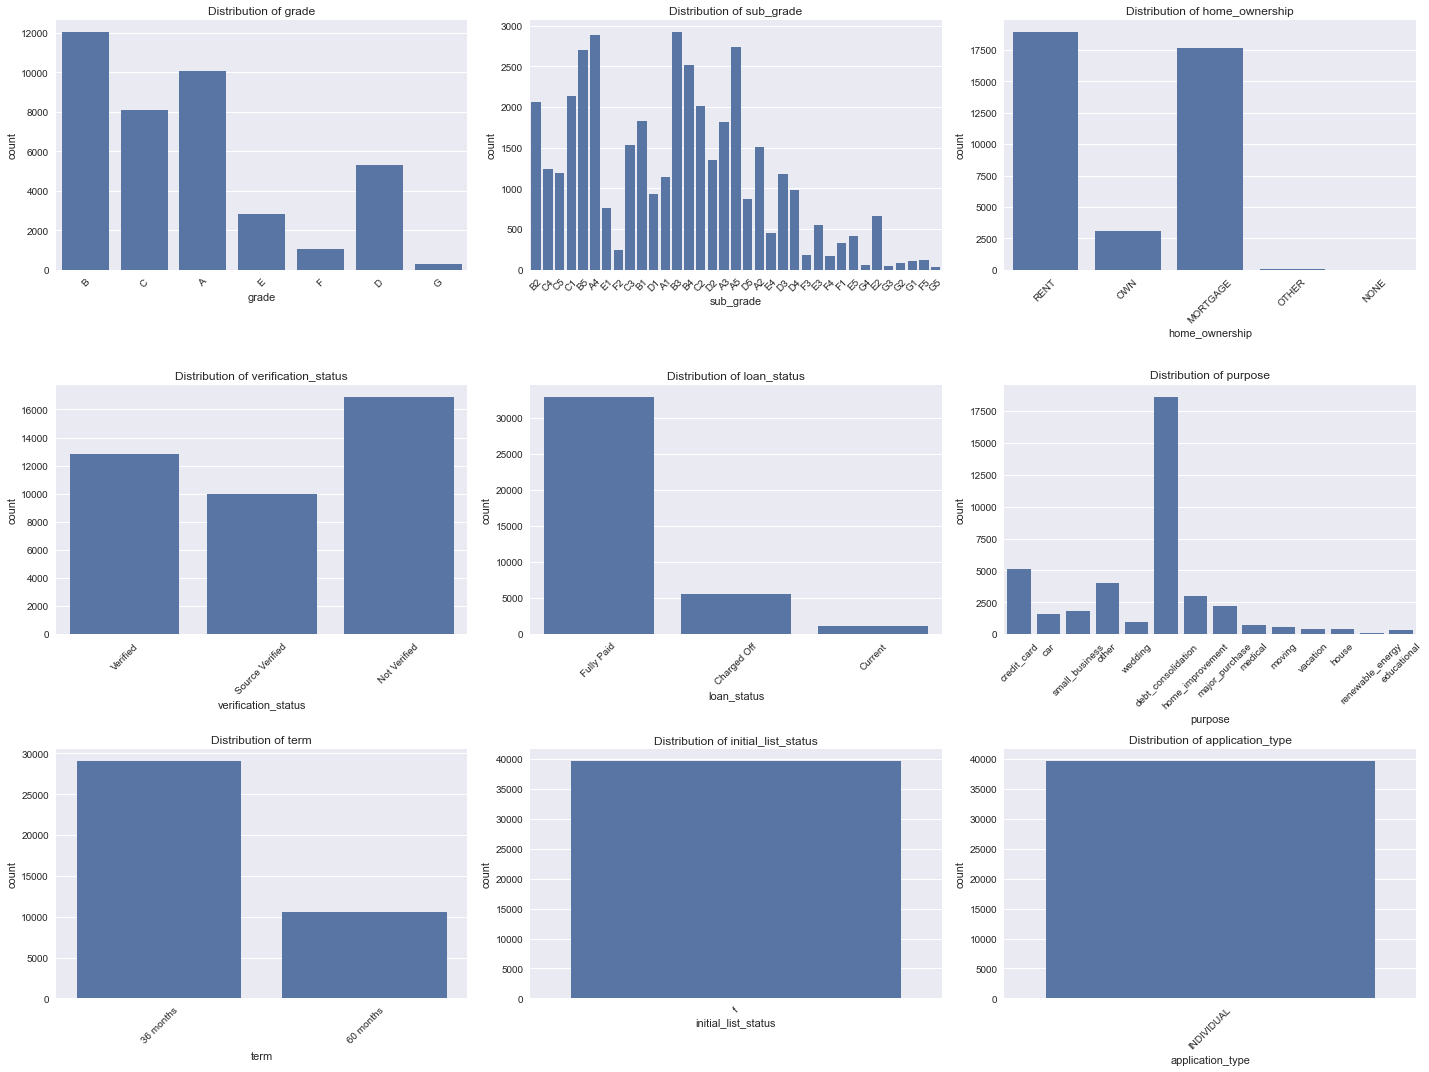


Distribution of grade:
B    30.26
A    25.39
C    20.39
D    13.36
E     7.16
F     2.64
G     0.80
Name: grade, dtype: float64 %
--------------------------------------------------

Distribution of sub_grade:
B3    7.34
A4    7.27
A5    6.90
B5    6.81
B4    6.32
C1    5.38
B2    5.18
C2    5.06
B1    4.61
A3    4.56
C3    3.85
A2    3.80
D2    3.39
C4    3.11
C5    2.99
D3    2.95
A1    2.87
D4    2.47
D1    2.34
D5    2.20
E1    1.92
E2    1.65
E3    1.39
E4    1.14
E5    1.05
F1    0.83
F2    0.63
F3    0.47
F4    0.42
F5    0.30
G1    0.26
G2    0.20
G4    0.14
G3    0.12
G5    0.08
Name: sub_grade, dtype: float64 %
--------------------------------------------------

Distribution of home_ownership:
RENT        47.58
MORTGAGE    44.46
OWN          7.70
OTHER        0.25
NONE         0.01
Name: home_ownership, dtype: float64 %
--------------------------------------------------

Distribution of verification_status:
Not Verified       42.60
Verified           32.25
Source Verified    

In [190]:
# List of categorical variables
cat_vars = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 
            'loan_status', 'purpose', 'term', 'initial_list_status', 'application_type']

# Create plots for each categorical variable
plt.figure(figsize=(20, 15))
for i, var in enumerate(cat_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=var)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

# Print percentage distribution for each categorical variable
for var in cat_vars:
    print(f"\nDistribution of {var}:")
    print(df[var].value_counts(normalize=True).mul(100).round(2), "%")
    print("-" * 50)

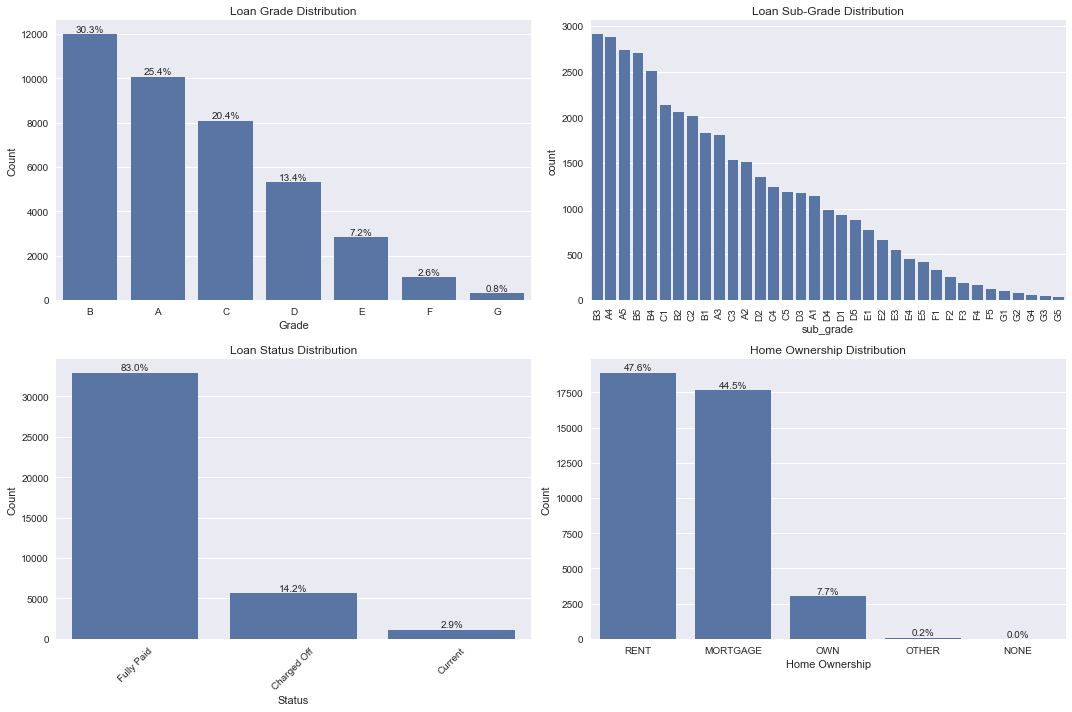

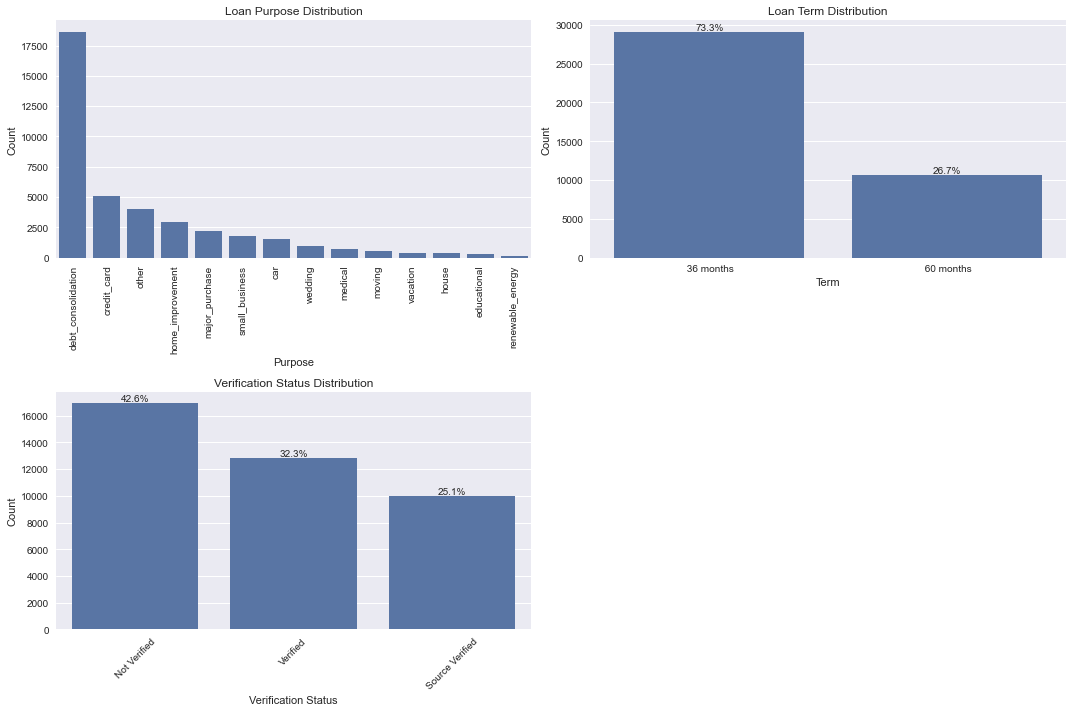

In [192]:
# Set figure size for better visualization
plt.figure(figsize=(15, 10))

# 1. Grade Distribution with percentages
plt.subplot(2, 2, 1)
grade_counts = df['grade'].value_counts()
grade_percents = df['grade'].value_counts(normalize=True).mul(100).round(1)

sns.barplot(x=grade_counts.index, y=grade_counts.values)
plt.title('Loan Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Count')

# Add percentage labels on top of each bar
for i, v in enumerate(grade_counts.values):
    plt.text(i, v, f'{grade_percents[i]}%', ha='center', va='bottom')

# 2. Sub-grade Distribution
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='sub_grade', order=df['sub_grade'].value_counts().index)
plt.title('Loan Sub-Grade Distribution')
plt.xticks(rotation=90)

# 3. Loan Status Distribution with percentages
plt.subplot(2, 2, 3)
status_counts = df['loan_status'].value_counts()
status_percents = df['loan_status'].value_counts(normalize=True).mul(100).round(1)

sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Loan Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, v in enumerate(status_counts.values):
    plt.text(i, v, f'{status_percents[i]}%', ha='center', va='bottom')

# 4. Home Ownership Distribution with percentages
plt.subplot(2, 2, 4)
home_counts = df['home_ownership'].value_counts()
home_percents = df['home_ownership'].value_counts(normalize=True).mul(100).round(1)

sns.barplot(x=home_counts.index, y=home_counts.values)
plt.title('Home Ownership Distribution')
plt.xlabel('Home Ownership')
plt.ylabel('Count')

for i, v in enumerate(home_counts.values):
    plt.text(i, v, f'{home_percents[i]}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Create second figure for remaining categories
plt.figure(figsize=(15, 10))

# 5. Purpose Distribution
plt.subplot(2, 2, 1)
purpose_counts = df['purpose'].value_counts()
purpose_percents = df['purpose'].value_counts(normalize=True).mul(100).round(1)

sns.barplot(x=purpose_counts.index, y=purpose_counts.values)
plt.title('Loan Purpose Distribution')
plt.xticks(rotation=90)
plt.xlabel('Purpose')
plt.ylabel('Count')

# 6. Term Distribution
plt.subplot(2, 2, 2)
term_counts = df['term'].value_counts()
term_percents = df['term'].value_counts(normalize=True).mul(100).round(1)

sns.barplot(x=term_counts.index, y=term_counts.values)
plt.title('Loan Term Distribution')
plt.xlabel('Term')
plt.ylabel('Count')

for i, v in enumerate(term_counts.values):
    plt.text(i, v, f'{term_percents[i]}%', ha='center', va='bottom')

# 7. Verification Status Distribution
plt.subplot(2, 2, 3)
verify_counts = df['verification_status'].value_counts()
verify_percents = df['verification_status'].value_counts(normalize=True).mul(100).round(1)

sns.barplot(x=verify_counts.index, y=verify_counts.values)
plt.title('Verification Status Distribution')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, v in enumerate(verify_counts.values):
    plt.text(i, v, f'{verify_percents[i]}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [193]:
# Combine loan purposes into meaningful groups
df['purpose_grouped'] = df['purpose'].replace({
    # Debt Related
    'debt_consolidation': 'Debt Related',
    'credit_card': 'Debt Related',
    
    # Home Related
    'home_improvement': 'Home Related',
    'house': 'Home Related',
    
    # Business
    'small_business': 'Business',
    
    # Personal
    'vacation': 'Personal',
    'wedding': 'Personal',
    'medical': 'Personal',
    'moving': 'Personal',
    'educational': 'Personal',
    
    # Major Purchase
    'major_purchase': 'Major Purchase',
    'car': 'Major Purchase',
    
    # Others
    'renewable_energy': 'Other',
    'other': 'Other'
})

# Verify the new grouping
print("Distribution of grouped purposes:")
print(df['purpose_grouped'].value_counts(normalize=True).mul(100).round(2), "%")

Distribution of grouped purposes:
Debt Related      59.85
Other             10.31
Major Purchase     9.41
Home Related       8.45
Personal           7.37
Business           4.60
Name: purpose_grouped, dtype: float64 %


In [194]:
# Combine home ownership categories
df['home_ownership_grouped'] = df['home_ownership'].replace({
    'RENT': 'RENT',
    'MORTGAGE': 'MORTGAGE',
    'OWN': 'OWN',
    'OTHER': 'OWN',  # Combining with OWN due to small numbers
    'NONE': 'OWN'    # Combining with OWN due to small numbers
})

print("\nDistribution of grouped home ownership:")
print(df['home_ownership_grouped'].value_counts(normalize=True).mul(100).round(2), "%")


Distribution of grouped home ownership:
RENT        47.58
MORTGAGE    44.46
OWN          7.95
Name: home_ownership_grouped, dtype: float64 %


In [195]:
# Combine lower grades due to small numbers
df['grade_grouped'] = df['grade'].replace({
    'G': 'F_G',  # Combining F and G due to low frequencies
    'F': 'F_G'
})

print("\nDistribution of grouped grades:")
print(df['grade_grouped'].value_counts(normalize=True).mul(100).round(2), "%")


Distribution of grouped grades:
B      30.26
A      25.39
C      20.39
D      13.36
E       7.16
F_G     3.44
Name: grade_grouped, dtype: float64 %


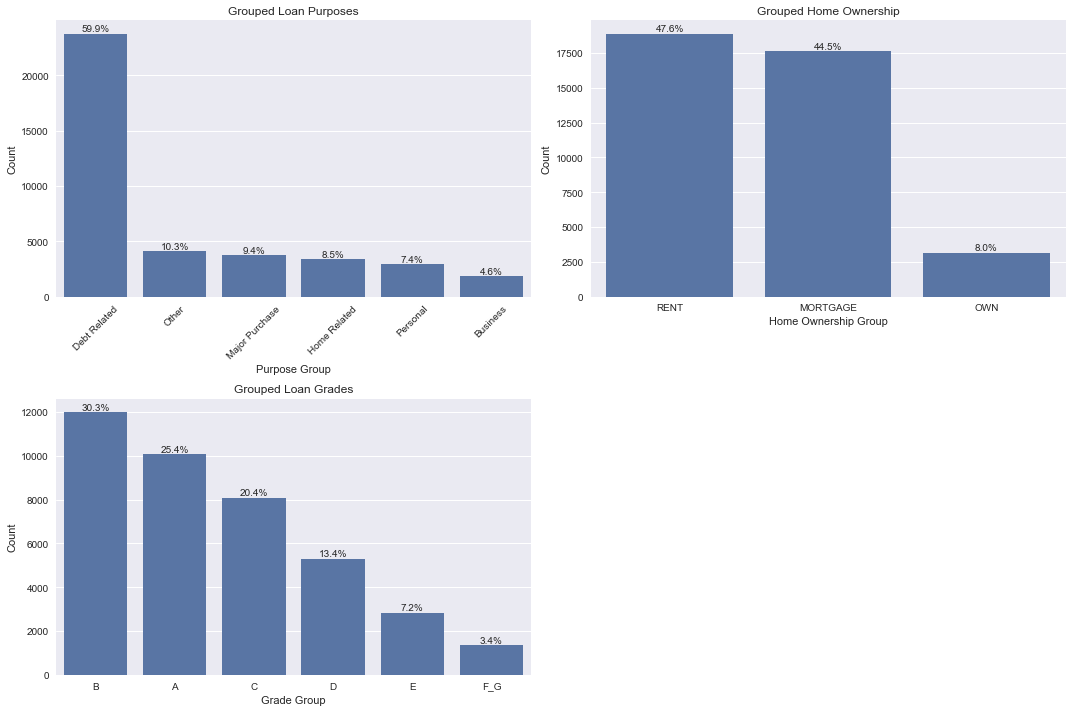


Distribution of Grouped Purposes:
Debt Related      59.85
Other             10.31
Major Purchase     9.41
Home Related       8.45
Personal           7.37
Business           4.60
Name: purpose_grouped, dtype: float64 %

Distribution of Grouped Home Ownership:
RENT        47.58
MORTGAGE    44.46
OWN          7.95
Name: home_ownership_grouped, dtype: float64 %

Distribution of Grouped Grades:
B      30.26
A      25.39
C      20.39
D      13.36
E       7.16
F_G     3.44
Name: grade_grouped, dtype: float64 %


In [196]:
# Create visualizations for grouped categories
plt.figure(figsize=(15, 10))

# 1. Grouped Purposes
plt.subplot(2, 2, 1)
purpose_grouped_counts = df['purpose_grouped'].value_counts()
purpose_grouped_percents = df['purpose_grouped'].value_counts(normalize=True).mul(100).round(1)

sns.barplot(x=purpose_grouped_counts.index, y=purpose_grouped_counts.values)
plt.title('Grouped Loan Purposes')
plt.xticks(rotation=45)
plt.xlabel('Purpose Group')
plt.ylabel('Count')

for i, v in enumerate(purpose_grouped_counts.values):
   plt.text(i, v, f'{purpose_grouped_percents[i]}%', ha='center', va='bottom')

# 2. Grouped Home Ownership
plt.subplot(2, 2, 2)
home_grouped_counts = df['home_ownership_grouped'].value_counts()
home_grouped_percents = df['home_ownership_grouped'].value_counts(normalize=True).mul(100).round(1)

sns.barplot(x=home_grouped_counts.index, y=home_grouped_counts.values)
plt.title('Grouped Home Ownership')
plt.xlabel('Home Ownership Group')
plt.ylabel('Count')

for i, v in enumerate(home_grouped_counts.values):
   plt.text(i, v, f'{home_grouped_percents[i]}%', ha='center', va='bottom')

# 3. Grouped Grades
plt.subplot(2, 2, 3)
grade_grouped_counts = df['grade_grouped'].value_counts()
grade_grouped_percents = df['grade_grouped'].value_counts(normalize=True).mul(100).round(1)

sns.barplot(x=grade_grouped_counts.index, y=grade_grouped_counts.values)
plt.title('Grouped Loan Grades')
plt.xlabel('Grade Group')
plt.ylabel('Count')

for i, v in enumerate(grade_grouped_counts.values):
   plt.text(i, v, f'{grade_grouped_percents[i]}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the distributions
print("\nDistribution of Grouped Purposes:")
print(df['purpose_grouped'].value_counts(normalize=True).mul(100).round(2), "%")
print("\nDistribution of Grouped Home Ownership:")
print(df['home_ownership_grouped'].value_counts(normalize=True).mul(100).round(2), "%")
print("\nDistribution of Grouped Grades:")
print(df['grade_grouped'].value_counts(normalize=True).mul(100).round(2), "%")

In [30]:
# 1. Grade Groups vs Purpose Groups
plt.figure(figsize=(12, 6))
cross_tab_grade_purpose = pd.crosstab(df['grade_grouped'], df['purpose_grouped'], normalize='index') * 100
sns.heatmap(cross_tab_grade_purpose, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Distribution of Purposes Across Grade Groups (%)')
plt.ylabel('Grade Groups')
plt.xlabel('Purpose Groups')
plt.xticks(rotation=45)
plt.show()

# 2. Grade Groups vs Home Ownership
plt.figure(figsize=(10, 6))
cross_tab_grade_home = pd.crosstab(df['grade_grouped'], df['home_ownership_grouped'], normalize='index') * 100
sns.heatmap(cross_tab_grade_home, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Distribution of Home Ownership Across Grade Groups (%)')
plt.ylabel('Grade Groups')
plt.xlabel('Home Ownership Groups')
plt.show()

# 3. Purpose Groups vs Home Ownership
plt.figure(figsize=(12, 6))
cross_tab_purpose_home = pd.crosstab(df['purpose_grouped'], df['home_ownership_grouped'], normalize='index') * 100
sns.heatmap(cross_tab_purpose_home, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Distribution of Home Ownership Across Purpose Groups (%)')
plt.ylabel('Purpose Groups')
plt.xlabel('Home Ownership Groups')
plt.show()

# 4. Bar plot showing loan status distribution for each group
plt.figure(figsize=(15, 5))

# Loan Status by Grade Groups
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='grade_grouped', hue='loan_status')
plt.title('Loan Status by Grade Groups')
plt.xticks(rotation=45)

# Loan Status by Purpose Groups
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='purpose_grouped', hue='loan_status')
plt.title('Loan Status by Purpose Groups')
plt.xticks(rotation=45)

# Loan Status by Home Ownership Groups
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='home_ownership_grouped', hue='loan_status')
plt.title('Loan Status by Home Ownership')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

KeyError: 'grade_grouped'

<Figure size 1200x600 with 0 Axes>

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


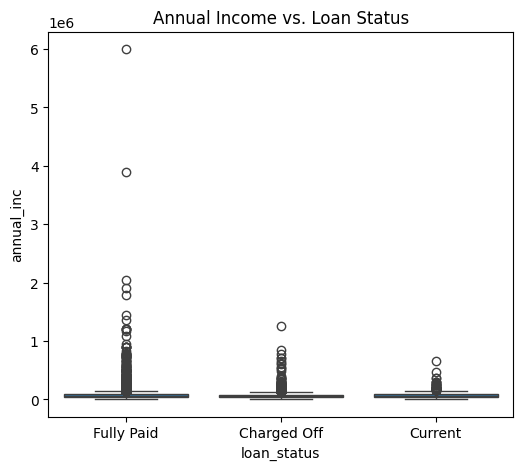

In [33]:
#describing annual income and how it affects loan payment status
print(df['annual_inc'].describe())
plt.figure(figsize=(6, 5))
sns.boxplot(x='loan_status', y='annual_inc', data=df)
plt.title('Annual Income vs. Loan Status')
plt.show()

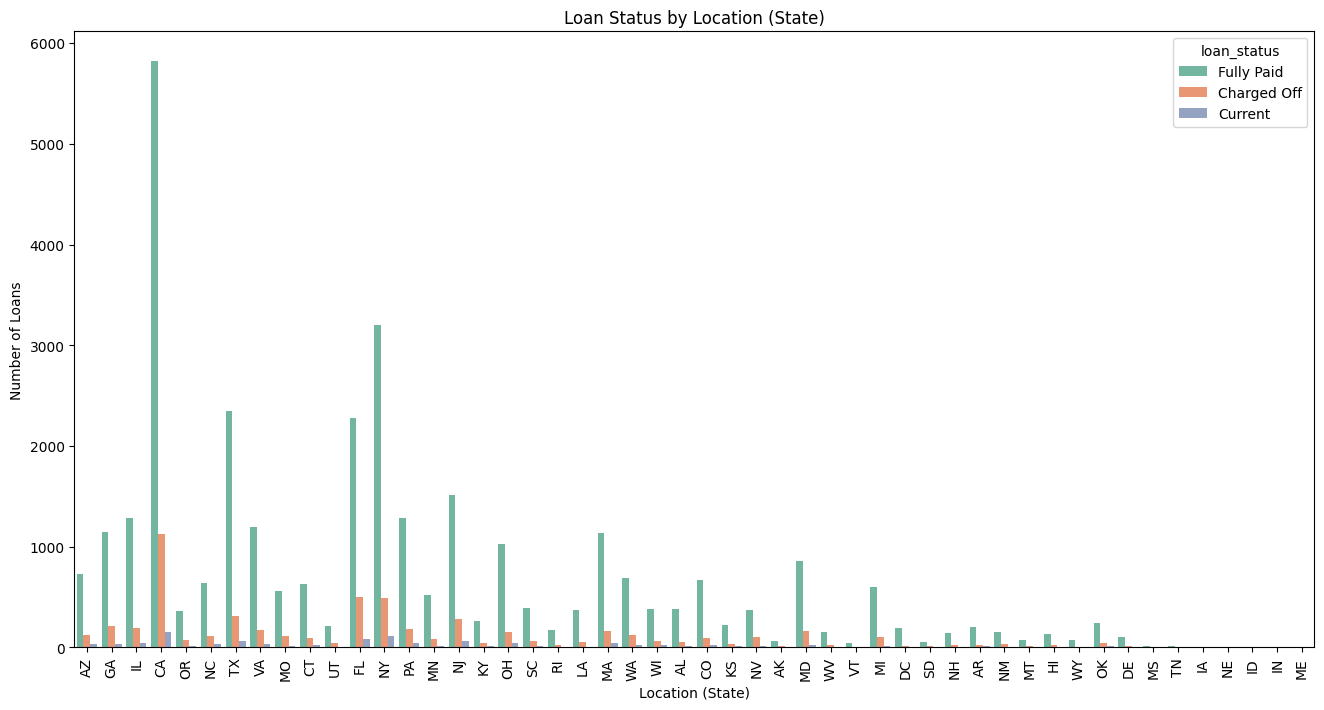

In [36]:
#Analysis loan status based on locations
plt.figure(figsize=(16, 8))
sns.countplot(x='addr_state', hue='loan_status', data=df, palette='Set2')
plt.xticks(rotation=90)
plt.title('Loan Status by Location (State)')
plt.xlabel('Location (State)')
plt.ylabel('Number of Loans')
plt.show()

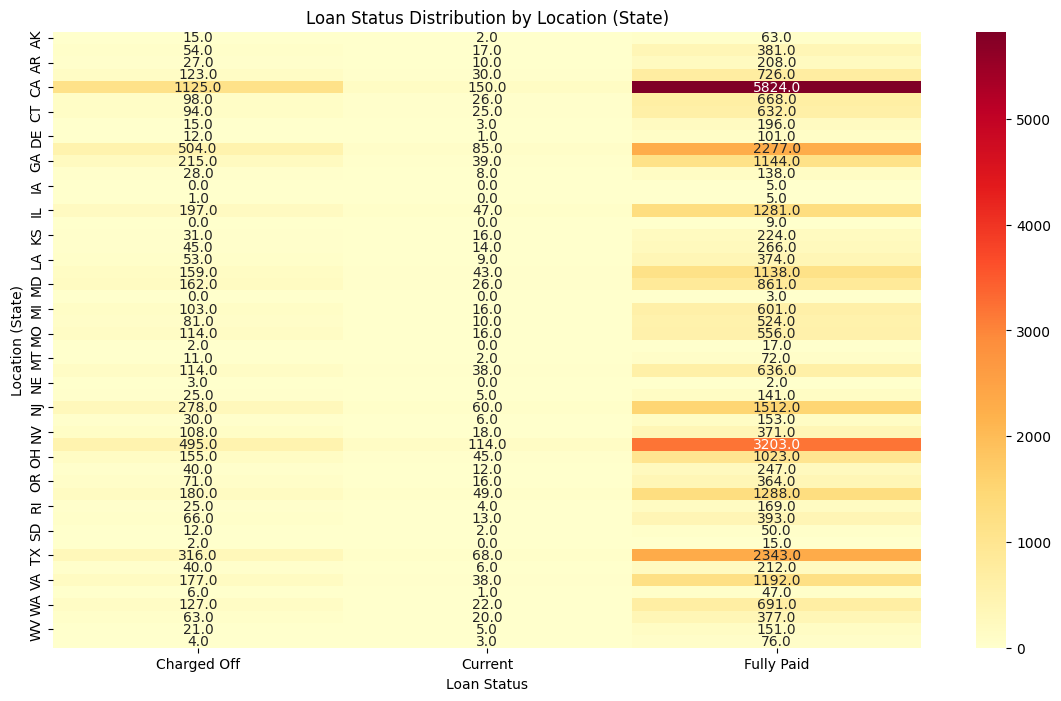

In [41]:
#To check which locations have highest number of loan defaulters
location_status = df.groupby(['addr_state', 'loan_status']).size().unstack().fillna(0)
plt.figure(figsize=(14, 8))

sns.heatmap(location_status, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Loan Status Distribution by Location (State)')
plt.ylabel('Location (State)')
plt.xlabel('Loan Status')
plt.show()